 <font size="3"> Formula 1 is the highest level of single-seat racing. 2020 showed a remarkable growth rate in viewage despite the coronavirus pandemic punishing many other forms of entertainment. With 2021 crowning the first Dutch winner, I decided to dig deep into some datasets and see which country develops the best drivers.

Link for driver nationality data: https://www.kaggle.com/cjgdev/formula-1-race-data-19502017?select=pitStops.csv  
    Download the drivers.csv file.
    
Link for championship winners data: https://www.kaggle.com/deepshah16/formula-1-19502020?select=DriversStandings.csv
    <br>Download the DriversStandings.csv file.

In [37]:
import import_ipynb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
%matplotlib inline

In [39]:
drivers = pd.read_csv('drivers.csv',encoding='latin-1')
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44.0,HAM,Lewis,Hamilton,07/01/1985,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,10/05/1977,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6.0,ROS,Nico,Rosberg,27/06/1985,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14.0,ALO,Fernando,Alonso,29/07/1981,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,19/10/1981,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [4]:
drivers['nationality'].value_counts().head()

British     162
American    157
Italian      99
French       73
German       49
Name: nationality, dtype: int64

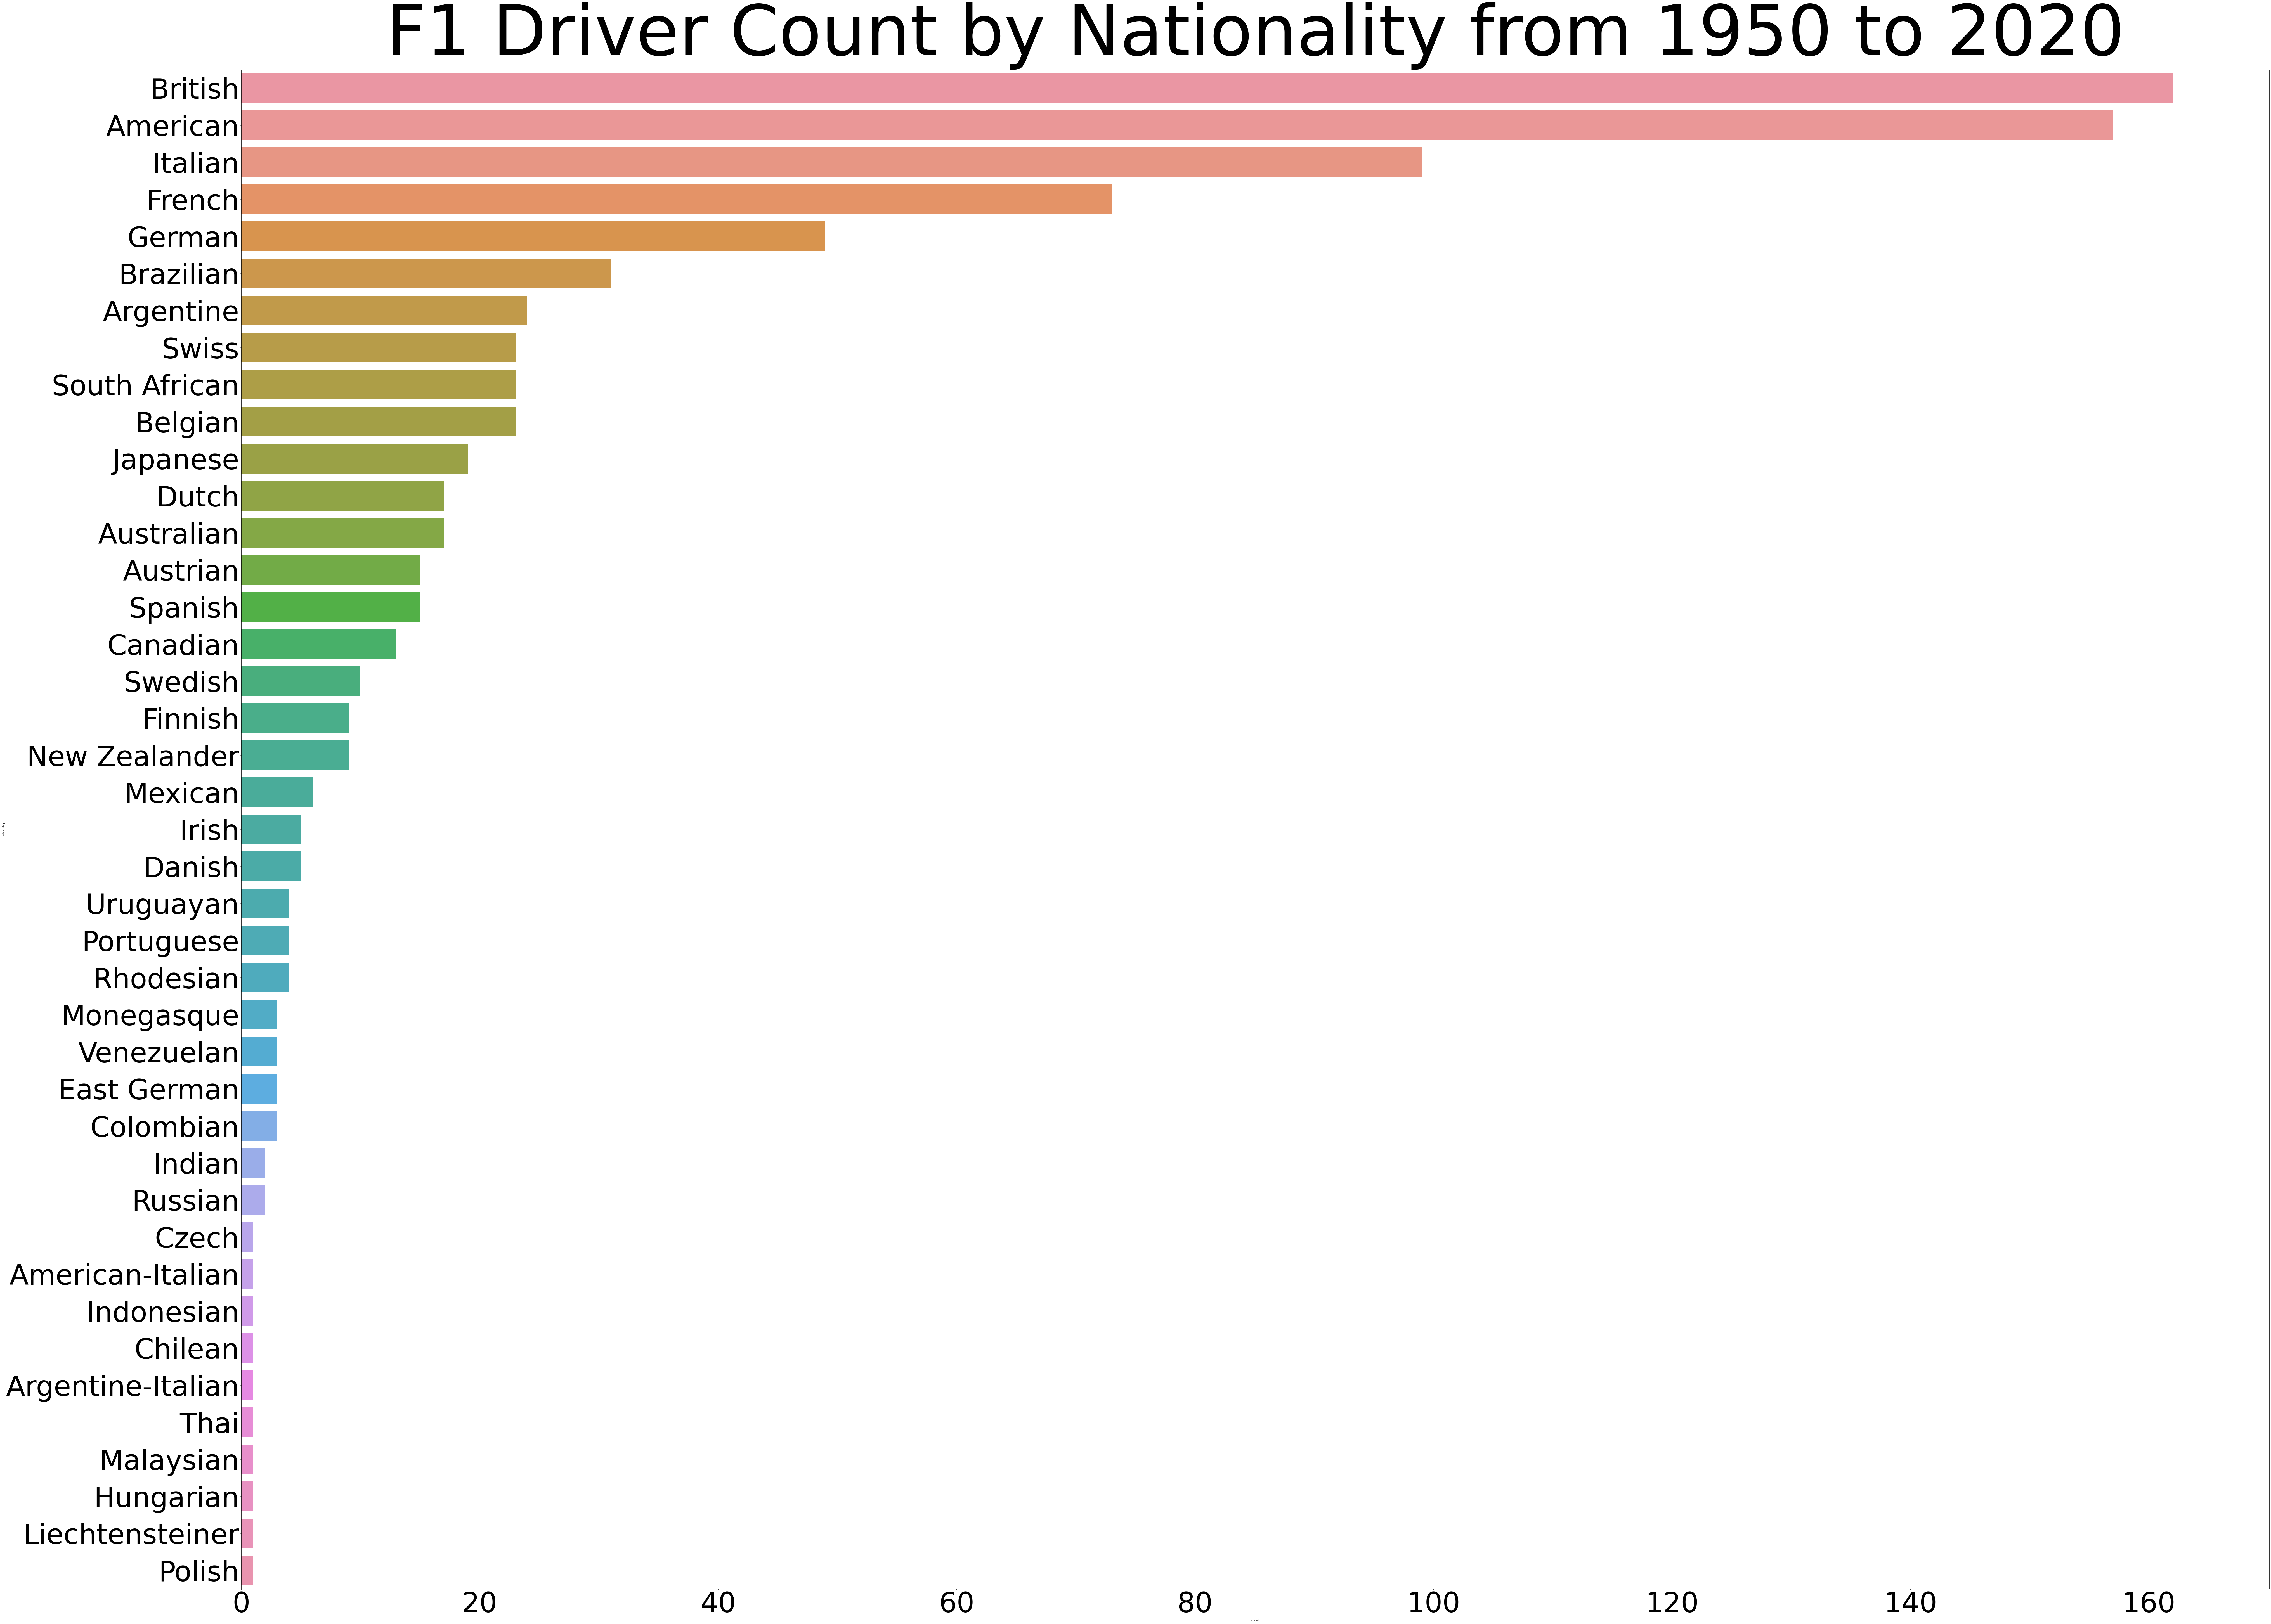

In [5]:
plt.figure(figsize=(130,100))
sns.countplot(data=drivers, y=drivers['nationality'], order = drivers['nationality'].value_counts().index)
plt.yticks(size=100)
plt.xticks(size=100)
plt.title('F1 Driver Count by Nationality from 1950 to 2020', fontsize=250)
plt.show()

 <font size="3"> Pictured above is a countplot of every Formula 1 driver's nationality from 1950 to 2020. I was surprised to see there were so many American drivers.</font>

In [6]:
standings = pd.read_csv('DriversStandings.csv')
standings.head()

,Unnamed: 0,Pos,Driver,Nationality,Car,PTS,Year
0,0,1,Nino Farina FAR,ITA,Alfa Romeo,30.0,1950
1,1,2,Juan Manuel Fangio FAN,ARG,Alfa Romeo,27.0,1950
2,2,3,Luigi Fagioli FAG,ITA,Alfa Romeo,24.0,1950
3,3,4,Louis Rosier ROS,FRA,Talbot-Lago,13.0,1950
4,4,5,Alberto Ascari ASC,ITA,Ferrari,11.0,1950


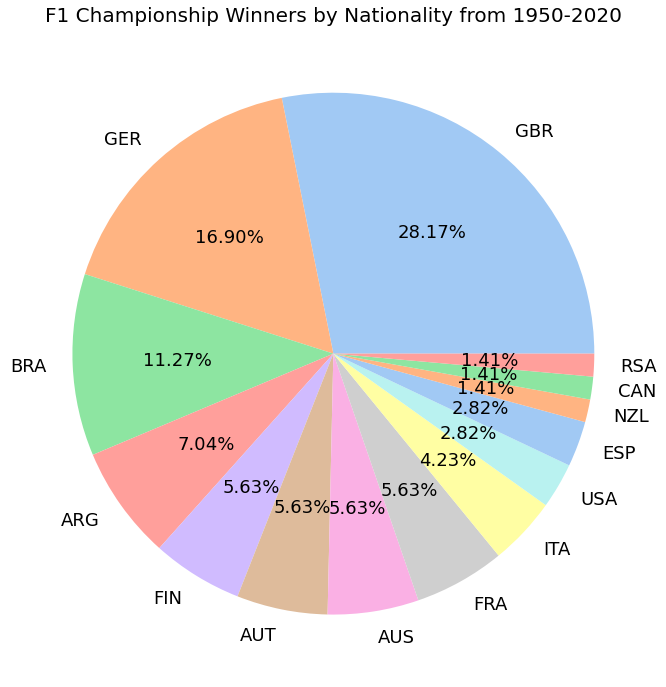

In [7]:
winners = standings[standings['Pos']=='1']  # only includes championship winners
country_wins = winners['Nationality'].value_counts().tolist()  # num of times country wins
countries = winners["Nationality"].value_counts().index.tolist()  # uses index to make sure list starts with most winning country

colors = sns.color_palette('pastel')[0:len(countries)]

plt.figure(figsize=(12,12))
plt.pie(country_wins, labels=countries,autopct='%1.2f%%',textprops={'fontsize': 18}, colors = colors)
plt.title('F1 Championship Winners by Nationality from 1950-2020', fontsize=20)
plt.show()


<font size=3> The pie chart above shows how successful countries have been in F1. Immediately, I notice that the USA has had very little success despite producing the 2nd most amount of drivers. Almost every country pictured is from Europe, except for notably Brazil, Argentina, and Australia which account for 24% altogether. Britain proves its dominance (28%) as it has the highest amount of both champions and drivers in general. Let's take a look at how successful British drivers have been over time.

In [31]:
#GBR_winners = winners[winners['Nationality']=='GBR']


In [40]:
GBR_winners = winners[winners['Nationality']=='GBR']
GBR_years = GBR_winners['Year'].tolist()  

In [41]:
years_list = np.array(GBR_winners['Year'].tolist())
GBR_years = pd.to_numeric(GBR_years, downcast="integer") # the years GBR won
num_of_years = len(GBR_years.tolist())  # finds the amount of wins 

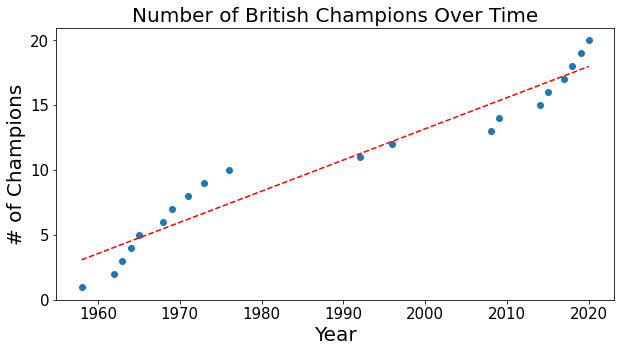

In [42]:
wins_list = np.array(range(num_of_years)) + 1  # add 1 because list will start at 0
a,b = np.polyfit(GBR_years.tolist(), wins_list, 1) 
plt.figure(figsize=(10,5))
plt.scatter(x=years_list, y= wins_list)
#sns.lmplot(x=GBR_years.tolist(), y=wins_list-1, data=GBR_years)
plt.plot(years_list, a*years_list + b, 'r', linestyle='--')  # best fit line
plt.xticks([1960, 1970, 1980, 1990, 2000, 2010, 2020], fontsize=15)
plt.yticks([0,5,10,15,20], fontsize=15)
plt.xlabel('Year', fontsize=20)
plt.ylabel('# of Champions', fontsize=20)
#plt.set_xticklabels(years_list, fontsize=10)
plt.title('Number of British Champions Over Time', fontsize=20)
plt.show()

<font size=3> I expected the data to mostly resemble a linear function, but it ended up appearing logistic. This is largely because there are 2 big gaps in the data. Britian didn't produce a single champion during the 1980s and again from, the late 90s to early 2000s. 
    
Pictured below is a dataframe that confirms a gap of British nationality from 1976 (James Hunt) to 1992 (Nigel Mansell). 

In [255]:
winners[winners['Year'].between(1976, 1992)]

,Unnamed: 0,Pos,Driver,Nationality,Car,PTS,Year
582,582,1,James Hunt HUN,GBR,McLaren Ford,69.0,1976
602,602,1,Niki Lauda LAU,AUT,Ferrari,72.0,1977
623,623,1,Mario Andretti AND,USA,Lotus Ford,64.0,1978
644,644,1,Jody Scheckter SCH,RSA,Ferrari,51.0,1979
665,665,1,Alan Jones JON,AUS,Williams Ford,67.0,1980
686,686,1,Nelson Piquet PIQ,BRA,Brabham Ford,50.0,1981
707,707,1,Keke Rosberg ROS,FIN,Williams Ford,44.0,1982
733,733,1,Nelson Piquet PIQ,BRA,Brabham BMW,59.0,1983
753,753,1,Niki Lauda LAU,AUT,McLaren TAG,72.0,1984
773,773,1,Alain Prost PRO,FRA,McLaren TAG,73.0,1985


<font size = 3> So what does this mean?
Well, like any sport, Formula 1 has periods of player domination. From 1976 to 1992, Brazilians and the French conquered. But let's take a look at some recent data. Below is the same dataframe from 2010-2020.

In [256]:
winners[winners['Year'].between(2010,2020)]

,Unnamed: 0,Pos,Driver,Nationality,Car,PTS,Year
1318,1318,1,Sebastian Vettel VET,GER,RBR Renault,256.0,2010
1345,1345,1,Sebastian Vettel VET,GER,Red Bull Racing Renault,392.0,2011
1373,1373,1,Sebastian Vettel VET,GER,Red Bull Racing Renault,281.0,2012
1398,1398,1,Sebastian Vettel VET,GER,Red Bull Racing Renault,397.0,2013
1421,1421,1,Lewis Hamilton HAM,GBR,Mercedes,384.0,2014
1444,1444,1,Lewis Hamilton HAM,GBR,Mercedes,381.0,2015
1465,1465,1,Nico Rosberg ROS,GER,Mercedes,385.0,2016
1489,1489,1,Lewis Hamilton HAM,GBR,Mercedes,363.0,2017
1512,1512,1,Lewis Hamilton HAM,GBR,Mercedes,408.0,2018
1532,1532,1,Lewis Hamilton HAM,GBR,Mercedes,413.0,2019


<font size = 3> Every champion since 2010 has either driven a Red Bull or Mercedes car. Also, every driver has been British or German. But what's really fascinating is the PTS column. Almost every winner in the 20th century dataframe scored under 100 points. But 2010s drivers are scoring close to 400 points! 

So what's changed? Well it's simple. The best cars are so good there is simply no competition. F1 is extremely dependent on their cars. Sure the drivers are the best in the world, but if they don't have a car fast enough to showcase their skills- it's impossible to fight for race wins. 
    
<br>These days, F1 cars are super technical. Steering wheels have over 25 buttons and each one has a vital purpose. 2010-13 F1 Champion, Sebastian Vettel said "I had to start my car like a computer, it's very complicated."
    
It's said that technology grows at an exponential rate over time. The highest level of technology is needed to build a championship-winning car. In order to win, you need to score a lot of points. Is there an exponential relationship between points scored over time?    
    

In [35]:
points = winners['PTS'].tolist()
years = winners['Year'].tolist()


Text(0.5, 1.0, 'Championship Points Scored Over Time')

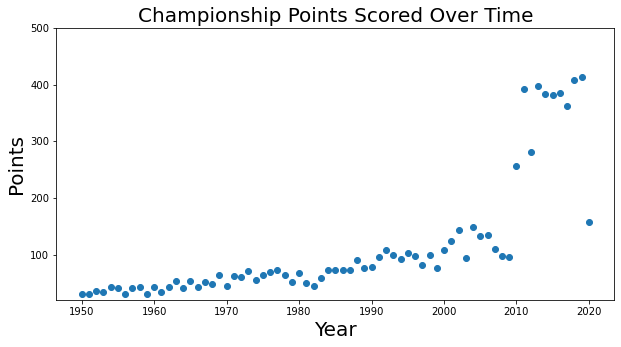

In [36]:
plt.figure(figsize=(10,5))
plt.scatter(x=winners['Year'], y=winners['PTS'])
plt.ylim(20,500)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Points', fontsize=20)
plt.title("Championship Points Scored Over Time", fontsize=20)

<font size =3> Here's the graph visualized. As to before 2000, it can be assumed that technology in auto-racing wasn't invested upon as much. But beginning around year 2000, advances in F1 tech really start to take off and points get scored at a rocket-like rate.
    
2020 is a clear outlier. COVID made it difficult for F1 to race in many countries so the race calendar was cut short, meaning less points can be scored. 2021 showed a turning point. F1 crowned a new champion, Max Verstappen, who became the first Dutch winner. This year challenged the status quo of a team domination by giving viewers a 2-team battle all season long. Because of this battle, the champion scored less points as he was able to win less races. 2021 marks a point total of 395.5, showing a slight dip from the 400 point cliff. 
<br>    
2022 will introduce new regulations based on car development. This will limit capital investments and bring each car closer to a general level of competitiveness. It's unlikely for a single team to dominate in this new era so it's safe to expect a downward trend toward 300 points. It's an exciting time to start watching F1 as new drivers, new cars, and new technology will dictate success. Nobody knows who will be fighting for race wins next year, but after this data collection I'm keeping my eyes on British drivers.